Here we import three full text corpuses

In [1]:
import json

# Import Counters, a pseudo-random collection of science (40k)
fn = 'C:/iPython Notebook/Output/all science/sci_JSON.txt'
with open(fn, encoding = 'UTF-8') as fh:
    science_text = json.load(fh)
fh.close()

# Import Counters, an index of nanotechnology articles (27k)
fn = 'C:/iPython Notebook/Output/nano/full_nano_JSON.txt'
with open(fn, encoding = 'UTF-8') as fh:
    nano_text = json.load(fh)
fh.close()

import json

# Import Counters, a pseudo-random collection of nanoparticles (17k)
fn = 'C:/iPython Notebook/Output/nano/full_nanopart_JSON.txt'
with open(fn, encoding = 'UTF-8') as fh:
    part_text = json.load(fh)
fh.close()

Here we import two counters containing all words found in a sample of nanotechnology and of science.

In [2]:
import json

# Import Counters, a pseudo-random collection of science (40k)
fn = 'C:/iPython Notebook/Output/all science/science_Counter.txt'
with open(fn, encoding = 'UTF-8') as fh:
    science = json.load(fh)
fh.close()

# Import Counters, an index of nanotechnology articles (27k)
fn = 'C:/iPython Notebook/Output/nano/nano_Counter.txt'
with open(fn, encoding = 'UTF-8') as fh:
    nano = json.load(fh)
fh.close()

import json

# Import Counters, a pseudo-random collection of nanoparticles (17k)
fn = 'C:/iPython Notebook/Output/nano/full_nanopart_Counter.txt'
with open(fn, encoding = 'UTF-8') as fh:
    part = json.load(fh)
fh.close()

# Example 1. Chi-Squared Analyses

Let's reweigh these by the total number of articles.

In [23]:

for key in nano.keys():
    nano[key] = nano[key]*(40/27)
    
for key in part.keys():
    part[key] = part[key]*(40/17)
    

Here we create a dictionary of keys found in both counters.

In [374]:
import itertools
import collections

short_sci = {}
short_nano = {}
short_part = {}

a = collections.Counter(science)
b = collections.Counter(nano)
c = collections.Counter(part)
d = a+b+c

all_dict = d.most_common(100)
print(all_dict[0:19])

an_index = []

# Here we transfer all information into a single dictionary
for k in all_dict:
    akey = k[0]
    an_index.append(akey)
    if (akey in science.keys()):
        short_sci[akey]=science[akey]  
    else:
        short_sci[akey]=0
    if (akey in nano.keys()):
        short_nano[akey]=nano[akey]  
    else:
        short_nano[akey]=0
    if (akey in nano.keys()):
        short_part[akey]=part[akey]  
    else:
        short_part[akey]=0

[('stopwords', 2097746), ('use', 31128), ('studi', 20915), ('effect', 19290), ('patient', 17981), ('result', 15455), ('cell', 15259), ('model', 13731), ('activ', 12288), ('show', 12117), ('differ', 11826), ('increas', 11282), ('method', 10342), ('system', 9968), ('data', 9662), ('treatment', 9342), ('found', 9285), ('group', 9252), ('function', 8935)]


The next goal will be to create a data frame to do chi-squared testing.

In [25]:
import pandas as pd

df_sci = pd.DataFrame.from_dict(short_sci, orient='index')
df_nano = pd.DataFrame.from_dict(short_nano, orient='index')
df_part = pd.DataFrame.from_dict(short_part, orient='index')

frame = [df_sci, df_nano, df_part]
result = pd.concat(frame, axis=1)
result.columns = ['sci','nano','part']
result.head()

,sci,nano,part
reaction,3758,3702.222222,10929.411765
sampl,5338,3357.037037,8945.882353
carbon,2218,9688.888889,11903.529412
measur,8146,6900.740741,7049.411765
protein,7217,7167.407407,4882.352941


Here we reweight the words by the total number of words in the corpus.

In [50]:
result['sci']=result['sci']*1000/273
result['nano']=result['nano']*1000/329
result['part']=result['part']*1000/341

Here we develop the chi-squared tests. 

In [53]:
result['sci_nano']=(result['sci']-result['nano'])*(result['sci']-result['nano'])/result['sci']
result['sci_part']=(result['sci']-result['part'])*(result['sci']-result['part'])/result['sci']
result['nano_part']=(result['nano']-result['part'])*(result['nano']-result['part'])/result['nano']
result['chi_squared']=result['sci_nano']+result['sci_part']+result['nano_part']
result.sort(axis=0,columns='chi_squared',ascending=False).head(10)

,sci,nano,part,sci_nano,sci_part,nano_part,chi_squared
nanotechnolog,139.194139,99948.215693,1904.433328,71567961.418356,22386.498528,96175.636492,71686523.553376
nanoparticl,3531.135531,92675.897782,179423.839917,2250490.972873,8761556.497463,81199.164451,11093246.634787
deliveri,2619.047619,30264.550265,21500.776264,291813.639036,136125.694704,2537.745781,430477.079521
particl,7355.311355,28665.991219,53910.643436,61743.827599,294671.270932,22231.656345,378646.754875
technolog,4769.230769,44894.742767,4643.781266,337592.536616,3.299815,36087.519426,373683.355857
applic,12542.124542,73101.429697,36584.440228,292408.947826,46087.322892,18241.647604,356737.918322
nm,4439.560440,20673.195992,34293.600138,59359.688160,200754.939244,8973.716941,269088.344345
prepar,7417.582418,16877.181133,45830.602036,12063.769947,198927.358417,49670.651479,260661.779843
oxid,11937.728938,19403.354723,54911.160945,4668.858595,154695.743901,64978.676151,224343.278647
materi,11402.930403,54080.828549,33707.089874,159731.132770,43626.989917,7675.348894,211033.471581


Here we find that technology, nanotechnology, materials and delivery are more dedicatedly nanotechnoloigy. Particle, nanoparticle, preparation, oxides and nanometer are more dedicatedly nanoparticle research. Nanotechnology and nanoparticle research are much closer together than science as a whole, although there are differences.

In [54]:
# testing word count
a= sum(result['sci'])
b=sum(result['nano'])
c=sum(result['part'])
print("The total words in the science sample is",a)
print("The total words in the nano sample is",b)
print("The total words in the part sample is",c)

The total words in the science sample is 9991461.53846
The total words in the nano sample is 9997095.57582
The total words in the part sample is 9992189.06331


# Example 2. Binomial Test of Proportions

In [141]:
import re

Delft = re.compile('Delft Univ Technol')
Manchester = re.compile('Univ Manchester')
GT = re.compile('Georgia Inst Technol')

sci = {}
nano = {}
part = {}


delft_sci_list= []
manc_sci_list = []
gt_sci_list = []

for n,artid in enumerate(science_text.keys()):
    new_article=science_text[artid]
    if ('C1' in new_article.keys()):
        address= new_article['C1']
        if (Delft.search(address)):
            delft_sci_list.append(artid)
        if (GT.search(address)):
            gt_sci_list.append(artid)
        if (Manchester.search(address)):
            manc_sci_list.append(artid)
            
sci['Delft'] = len(delft_sci_list)
sci['Manc'] = len(manc_sci_list)
sci['GT'] = len(gt_sci_list)

print(len(delft_sci_list))
print(len(manc_sci_list))
print(len(gt_sci_list))

print()

delft_nano_list= []
manc_nano_list = []
gt_nano_list = []

for n,artid in enumerate(nano_text.keys()):
    new_article=nano_text[artid]
    address= new_article['C1']
    if (Delft.search(address)):
        delft_nano_list.append(artid)
    if (GT.search(address)):
        gt_nano_list.append(artid)
    if (Manchester.search(address)):
        manc_nano_list.append(artid)

nano['Delft']= len(delft_nano_list)
nano['Manc'] = len(manc_nano_list)
nano['GT'] = len(gt_nano_list)

print(len(delft_nano_list))
print(len(manc_nano_list))
print(len(gt_nano_list))
print()

delft_part_list= []
manc_part_list = []
gt_part_list = []

for n,artid in enumerate(part_text.keys()):
    new_article=part_text[artid]
    address= new_article['C1']

    if (Delft.search(address)):
        delft_part_list.append(artid)
    if (GT.search(address)):
        gt_part_list.append(artid)
    if (Manchester.search(address)):
        manc_part_list.append(artid)

part['Delft']= len(delft_part_list)
part['Manc'] = len(manc_part_list)
part['GT'] = len(gt_part_list)

print(len(delft_part_list))
print(len(manc_part_list))
print(len(gt_part_list))
print()

54
144
56

80
89
278

29
24
39



In [148]:
import pandas as pd

df1  = pd.DataFrame.from_dict(sci, orient='index')
df2  = pd.DataFrame.from_dict(nano, orient='index')
df3  = pd.DataFrame.from_dict(part, orient='index')
df3.head()
frame1 = [df1, df2, df3]
result1 = pd.concat(frame1, axis=1)
result1.columns=['sci','nano','part']
#result1
result1

,sci,nano,part
Manc,144,89,24
Delft,54,80,29
GT,56,278,39


In [149]:
# correct with our real estimates of scientific activity
result1['sci']=result1['sci']*1599
result1['nano']=result1['nano']*1.909
result1['part']=result1['part']*50.21
result1

,sci,nano,part
Manc,230256,169.901,1205.04
Delft,86346,152.720,1456.09
GT,89544,530.702,1958.19


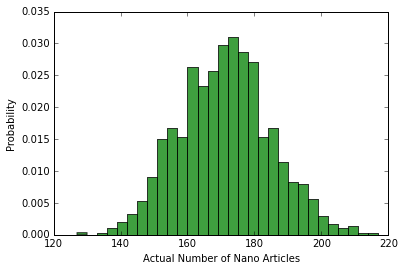

In [281]:
# What is the natural variation in the model
# If Manchester publishes nanotechnology at a constant rate, how many papers might there actually be

%matplotlib inline
import matplotlib.pyplot as plt

p = result1.at['Manc','nano']/result1.at['Manc','sci']
nn = result1.at['Manc','sci']

new_list = []

# Generate possibilities and display 
for i in range(1,1000):
    l=stat.binom.rvs(nn, p)
    new_list.append(l)

# the histogram of the data
n, bins, patches = plt.hist(new_list, 30, normed=1, facecolor='green', alpha=0.75)
plt.xlabel('Actual Number of Nano Articles')
plt.ylabel('Probability')
plt.show()

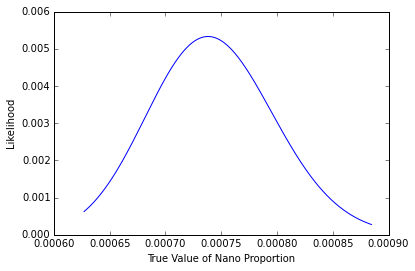

In [280]:
import scipy.stats as stat
from math import log


nn = result1.at['Manc','sci']
xx = result1.at['Manc','nano']
p = xx/nn

x=[]
y=[]
for i in range(850,1200):
    pp=p*i/1000
    l=stat.binom.pmf(170, nn, pp)
    y.append(l)
    x.append(pp)
    
yy = sum(y)
y = y/yy
plt.plot(x,y)
plt.xlabel('True Value of Nano Proportion')
plt.ylabel('Likelihood')

152.72


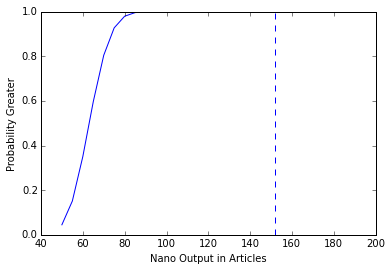

In [299]:
# Does Delft do proportionately less nanotechnology than Manchester? 
import scipy.stats as stat

p = result1.at['Manc','nano']/result1.at['Manc','sci']
nn = result1.at['Delft','sci']
xx = result1.at['Delft','nano']

x=[]
y=[]
print(xx)
for i in range(50,200,5):
    prob = stat.binom.cdf(i, nn, p)

    y.append(i)
    x.append(prob)
    

plt.plot(y,x)
plt.plot([152,152],[0,1],'b--')
plt.xlabel('Nano Output in Articles')
plt.ylabel('Probability Greater')

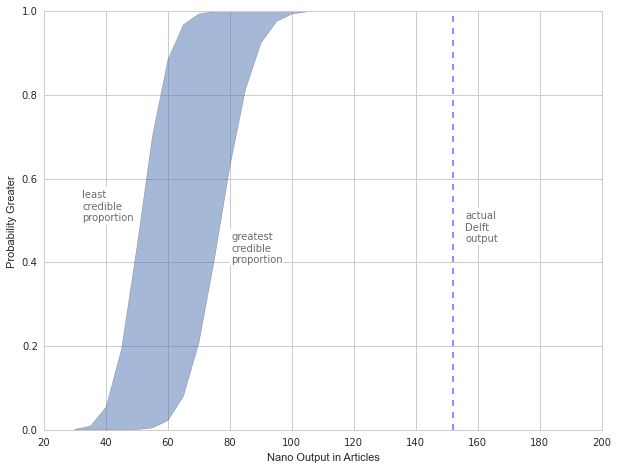

In [367]:
# Would it matter if we had over or under-estimated the rate?
import scipy.stats as stat
import seaborn as sns

sns.set_style('whitegrid')

fig = plt.figure(figsize=(10,7.5))
ax = fig.add_subplot(111)

p = result1.at['Manc','nano']/result1.at['Manc','sci']
nn = result1.at['Delft','sci']
xx = result1.at['Delft','nano']

x1=[]
x2=[]
y=[]

for i in range(300,2000,50):
    ii = i/10
    prob1 = stat.binom.cdf(ii, nn, 0.00060)
    prob2 = stat.binom.cdf(ii, nn, 0.00090)
    y.append(ii)
    x1.append(prob1)
    x2.append(prob2)
    

# ax.plot(y,x1,'b')
# ax.plot(y,x2,'b')

ax.fill_between(y, x1, x2, alpha=0.5)

ax.plot([152,152],[0,1],'b--', alpha=.5)
# ax.text('least\nproportion',xy=(60, .5), xytext=(55, .5),color='b')
# ax.text('greatest\nproportion',xy=(85, .4), xytext=(79, .4),color='b')
ax.text(32.5, .5,'least\ncredible\nproportion',color='#6B6B6B', bbox=dict(facecolor='white', edgecolor='None'))
ax.text(80.5, .4,'greatest\ncredible\nproportion',color='#6B6B6B', bbox=dict(facecolor='white', edgecolor='None'))
ax.text(156, .45,'actual\nDelft\noutput',color='#6B6B6B', bbox=dict(facecolor='white', edgecolor='None'))

ax.set_xlim(xmin=20)

plt.xlabel('Nano Output in Articles')
plt.ylabel('Probability Greater')
plt.show()